In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from pandas_profiling import ProfileReport 



Bad key savefig.frameon in file C:\Users\B.K.M.Bhat\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\B.K.M.Bhat\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\B.K.M.Bhat\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get an updated matp

In [3]:
mushroom = pd.read_csv('Mushroom.csv')
mushroom.shape

(8124, 23)

In [3]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
mushroom['class'].groupby(mushroom['class']).count()

class
e    4208
p    3916
Name: class, dtype: int64

In [6]:
mushroom['cap-shape'].groupby(mushroom['cap-shape']).count()

cap-shape
b     452
c       4
f    3152
k     828
s      32
x    3656
Name: cap-shape, dtype: int64

In [7]:
mushroom['cap-surface'].groupby(mushroom['cap-surface']).count()

cap-surface
f    2320
g       4
s    2556
y    3244
Name: cap-surface, dtype: int64

In [8]:
mushroom['cap-color'].groupby(mushroom['cap-color']).count()

cap-color
b     168
c      44
e    1500
g    1840
n    2284
p     144
r      16
u      16
w    1040
y    1072
Name: cap-color, dtype: int64

In [9]:
mushroom['bruises'].groupby(mushroom['bruises']).count()

bruises
f    4748
t    3376
Name: bruises, dtype: int64

In [10]:
mushroom['odor'].groupby(mushroom['odor']).count()

odor
a     400
c     192
f    2160
l     400
m      36
n    3528
p     256
s     576
y     576
Name: odor, dtype: int64

In [11]:
mushroom['gill-attachment'].groupby(mushroom['gill-attachment']).count()

gill-attachment
a     210
f    7914
Name: gill-attachment, dtype: int64

In [12]:
mushroom['gill-spacing'].groupby(mushroom['gill-spacing']).count()

gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64

In [13]:
mushroom['gill-size'].groupby(mushroom['gill-size']).count()

gill-size
b    5612
n    2512
Name: gill-size, dtype: int64

In [14]:
mushroom['gill-color'].groupby(mushroom['gill-color']).count()

gill-color
b    1728
e      96
g     752
h     732
k     408
n    1048
o      64
p    1492
r      24
u     492
w    1202
y      86
Name: gill-color, dtype: int64

In [15]:
mushroom['stalk-shape'].groupby(mushroom['stalk-shape']).count()

stalk-shape
e    3516
t    4608
Name: stalk-shape, dtype: int64

In [16]:
mushroom['stalk-root'].groupby(mushroom['stalk-root']).count() #question mark dropped after one hot encoding

stalk-root
?    2480
b    3776
c     556
e    1120
r     192
Name: stalk-root, dtype: int64

In [17]:
mushroom['stalk-surface-above-ring'].groupby(mushroom['stalk-surface-above-ring']).count()

stalk-surface-above-ring
f     552
k    2372
s    5176
y      24
Name: stalk-surface-above-ring, dtype: int64

In [18]:
mushroom['stalk-surface-below-ring'].groupby(mushroom['stalk-surface-below-ring']).count()

stalk-surface-below-ring
f     600
k    2304
s    4936
y     284
Name: stalk-surface-below-ring, dtype: int64

In [19]:
mushroom['stalk-color-above-ring'].groupby(mushroom['stalk-color-above-ring']).count()

stalk-color-above-ring
b     432
c      36
e      96
g     576
n     448
o     192
p    1872
w    4464
y       8
Name: stalk-color-above-ring, dtype: int64

In [20]:
mushroom['stalk-color-below-ring'].groupby(mushroom['stalk-color-below-ring']).count()

stalk-color-below-ring
b     432
c      36
e      96
g     576
n     512
o     192
p    1872
w    4384
y      24
Name: stalk-color-below-ring, dtype: int64

In [21]:
mushroom['veil-type'].groupby(mushroom['veil-type']).count()

veil-type
p    8124
Name: veil-type, dtype: int64

In [22]:
mushroom['veil-color'].groupby(mushroom['veil-color']).count()

veil-color
n      96
o      96
w    7924
y       8
Name: veil-color, dtype: int64

In [23]:
mushroom['ring-number'].groupby(mushroom['ring-number']).count()

ring-number
n      36
o    7488
t     600
Name: ring-number, dtype: int64

In [24]:
mushroom['ring-type'].groupby(mushroom['ring-type']).count()

ring-type
e    2776
f      48
l    1296
n      36
p    3968
Name: ring-type, dtype: int64

In [25]:
mushroom['spore-print-color'].groupby(mushroom['spore-print-color']).count()

spore-print-color
b      48
h    1632
k    1872
n    1968
o      48
r      72
u      48
w    2388
y      48
Name: spore-print-color, dtype: int64

In [26]:
mushroom['population'].groupby(mushroom['population']).count()

population
a     384
c     340
n     400
s    1248
v    4040
y    1712
Name: population, dtype: int64

In [27]:
mushroom['habitat'].groupby(mushroom['habitat']).count()

habitat
d    3148
g    2148
l     832
m     292
p    1144
u     368
w     192
Name: habitat, dtype: int64

In [28]:
mushroom.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [29]:
## Challenge 1: How to cleanse the data?  How to find missing values in all the columns at once? All variables are categorical. Whether they need to be converted into different columns or not(One hot encoding)?###

In [4]:
#creating a dictionary with readable names

dictionary = {'class' : {'e': 'edible', 'p': 'poisonous'} , 
           'cap-shape': {'b':'bell', 'c':'conical', 'x': 'convex' , 'f':'flat', 'k':'knobbed' , 's':'sunken'},
          'cap-surface':{'f':'fibrous','g':'grooves','y':'scaly', 's' :'smooth'},
          'cap-color': {'n':'brown','b':'buff','c':'cinnamon', 'g': 'gray', 'r':'green','p':'pink','u': 'purple', 'e': 'red', 'w' : 'white', 'y': 'yellow'},
          'bruises': {'t':'bruises','f':'no'},
          'odor': {'a':'almond','l' :'anise','c':'creosote','y':'fishy','f': 'foul','m':'musty','n' :'none','p':'pungent','s':'spicy'},
          'gill-attachment': {'a':'attached','d':'descending','f':'free','n':'notched'},
          'gill-spacing': {'c':'close','w':'crowded','d':'distant'},
          'gill-size': {'b':'broad','n':'narrow'},
          'gill-color': {'k':'black','n':'brown','b':'buff','h': 'chocolate','g':'gray','r': 'green', 'o' :'orange', 'p': 'pink', 'u' :'purple','e': 'red','w': 'white','y':'yellow'},
          'stalk-shape': {'e':'enlarging','t':'tapering'},
           'stalk-root': {'b':'bulbous','c':'club','u':'cup','e':'equal','z':'rhizomorphs','r':'rooted','?':'missing'},
           'stalk-surface-above-ring' : {'f':'fibrous','y':'scaly','k':'silky','s':'smooth'},
           'stalk-surface-below-ring': {'f':'fibrous','y':'scaly','k':'silky','s':'smooth'},
           'stalk-color-above-ring': {'n':'brown','b':'buff','c':'cinnamon', 'g' :'gray','o':'orange','p':'pink','e':'red','w':'white','y': 'yellow'},
           'stalk-color-below-ring': {'n':'brown','b':'buff','c':'cinnamon', 'g' :'gray','o':'orange','p':'pink','e':'red','w':'white','y': 'yellow'},
           'veil-type': {'p':'partial','u':'universal'},
           'veil-color': {'n': 'brown','o' :'orange','w': 'white', 'y':'yellow'},
           'ring-number': {'n':'none','o':'one','t' : 'two'},
           'ring-type': {'c':'cobwebby','e':'evanescent','f':'flaring','l': 'large','n':'none','p':'pendant','s':'sheathing','z':'zone'},
           'spore-print-color': {'k':'black','n':'brown','b':'buff','h': 'chocolate','g':'gray','r': 'green', 'o' :'orange', 'p': 'pink', 'u' :'purple','e': 'red','w': 'white','y':'yellow'},
           'population': {'a':'abundant','c':'clustered','n':'numerous','s':'scattered','v':'several','y':'solitary'},
           'habitat': {'g':'grasses','l':'leaves','m':'meadows','p':'paths','u':'urban','w':'waste','d':'woods'}
           

} 

In [5]:
mushroom_renamed = mushroom.replace(dictionary)

In [6]:
mushroom_renamed.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [33]:
mushroom_renamed.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [6]:
#One hot encoding done as all variables are categorical
mushroom_renamed_encoded = pd.get_dummies(mushroom_renamed)

In [70]:
mushroom_renamed_encoded.head()

,class_edible,class_poisonous,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_grooves,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [36]:
mushroom_renamed_encoded.describe()

,class_edible,class_poisonous,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_grooves,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.517971,0.482029,0.055638,0.000492,0.450025,0.387986,0.101920,0.003939,0.285574,0.000492,...,0.153619,0.497292,0.210734,0.264402,0.102413,0.035943,0.140817,0.045298,0.023634,0.387494
std,0.499708,0.499708,0.229235,0.022185,0.497527,0.487321,0.302562,0.062641,0.451715,0.022185,...,0.360605,0.500023,0.407855,0.441041,0.303209,0.186159,0.347854,0.207969,0.151914,0.487208
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
mushroom_renamed_encoded.drop(['class_poisonous' , 'stalk-root_missing'], axis =1, inplace =True)

In [38]:
mushroom_renamed_encoded.shape

(8124, 117)

In [10]:
mushroom_renamed_encoded.to_csv('mushroom_encoded.csv', index=False)

In [11]:
mushroom_renamed.to_csv('mushroom_renamed.csv', index=False)

In [ ]:
#EDA on the base dataset

In [11]:
cap_colors = mushroom_renamed['cap-color'].value_counts()
m_height = cap_colors.values.tolist() #Provides numerical values
cap_color_labels  = cap_colors.axes[0].tolist()
ind = np.arange(10)
width =0.7
colors = ['#DEB887','#778899','#DC143C','#FFFF99','#f8f8ff','#F0DC82','#FF69B4','#D22D1E','#C000C5','g']
fig, ax = plt.subplots(figsize=(10,7))
mushroom_bars = ax.bar(ind, m_height , width,color =colors)
ax.set_xticks(ind)
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'), fontsize=12)


[2284, 1840, 1500, 1072, 1040, 168, 144, 44, 16, 16]

brown       2284
gray        1840
red         1500
yellow      1072
white       1040
buff         168
pink         144
cinnamon      44
green         16
purple        16
Name: cap-color, dtype: int64

In [22]:
cap_color_labels

['brown',
 'gray',
 'red',
 'yellow',
 'white',
 'buff',
 'pink',
 'cinnamon',
 'green',
 'purple']

[Text(0, 0, 'brown'),
 Text(1, 0, 'gray'),
 Text(2, 0, 'red'),
 Text(3, 0, 'yellow'),
 Text(4, 0, 'white'),
 Text(5, 0, 'buff'),
 Text(6, 0, 'pink'),
 Text(7, 0, 'cinnamon'),
 Text(8, 0, 'purple'),
 Text(9, 0, 'green')]

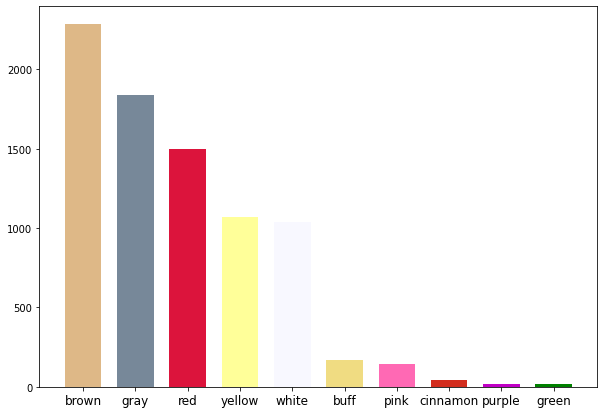

In [28]:
ind = np.arange(10)
width =0.7
colors = ['#DEB887','#778899','#DC143C','#FFFF99','#f8f8ff','#F0DC82','#FF69B4','#D22D1E','#C000C5','g']
fig, ax = plt.subplots(figsize=(10,7))
mushroom_bars = ax.bar(ind, m_height , width,color =colors)
ax.set_xticks(ind)
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'), fontsize=12)
